<a href="https://colab.research.google.com/github/gimenopea/CSCI6364/blob/main/GD%2C%20ID3%2C%20SVM%20-%20Project%202/CSCI6364_Project_2_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://github.com/gimenopea/CSCI6364/blob/main/GD,%20ID3,%20SVM%20-%20Project%202/Project2PartBInst.PNG?raw=true'>


Sample entropy can be calculated at:

\begin{align} H(X) = -\sum_{x}{p(x) * log_2\,{p(x)}} \end{align}


### 1. What is the sample entropy H(Y) for this training data?

In [2]:
#n samples = 
n_samples = 3 + 4 + 4 + 1 + 0 + 1 + 3 + 5
positive_classes = 3 + 4 + 4 + 1
negative_classes = 0 + 1 + 3 + 5

In [4]:
print(f'positive classes:{positive_classes} negative classes:{negative_classes} total samples:{n_samples}')

positive classes:12 negative classes:9 total samples:21


In [8]:
from math import log2

p_positive = positive_classes/n_samples
p_negative = negative_classes/n_samples
sample_entropy = -(p_positive*log2(p_positive) + p_negative*log2(p_negative))
print(f'sample entropy is {sample_entropy}')

sample entropy is 0.9852281360342515


### 2. What are the information gains IG(X1) and IG(X2)?

In [14]:
def calculate_entropy(label_count_positive, label_count_negative, n_samples):
  p_positive = label_count_positive/n_samples
  p_negative = label_count_negative/n_samples
  return -((p_positive)*log2(p_positive) + (p_negative)*log2(p_negative))


---

 2a. Information Gain IG(X1)

---

In [22]:
#Entropy H(Y) given X1 is positive
n_samples = 8 #instances for X1 is positive
label_count_positive = 7 
label_count_negative = 1 

#H(Y|X1 = positive)
H_y_X1_pos = calculate_entropy(label_count_positive, label_count_negative, n_samples)
print(f'H(Y|X1 = positive): {H_y_X1_pos}')

H(Y|X1 = positive): 0.5435644431995964


In [23]:
#Entropy H(Y)given X1 is negative
n_samples = 13 #instances for X1 is negative
label_count_positive = 5
label_count_negative = 8 

#H(Y|X1 = negative)
H_y_X1_neg = calculate_entropy(label_count_positive, label_count_negative, n_samples)
print(f'H(Y|X1 = negative): {H_y_X1_neg}')

H(Y|X1 = negative): 0.9612366047228759


In [33]:
#Information Gain IG(X1) = H(Y) - H(Y | X1)
p_positive_classes = 8/21
p_negative_classes = 13/21


IG_X1 = sample_entropy - p_positive_classes*H_y_X1_pos -  p_negative_classes*H_y_X1_neg

print(f'IG(X1): {IG_X1}')

IG(X1): 0.18310473570119645


---

 2a. Information Gain IG(X2)

---

In [29]:
#Entropy H(Y) given X2 is positive
n_samples = 10 #instances for X2 is positive
label_count_positive = 7 
label_count_negative = 3 

#H(Y|X1 = positive)
H_y_X2_pos = calculate_entropy(label_count_positive, label_count_negative, n_samples)
print(f'H(Y|X1 = positive): {H_y_X2_pos}')

H(Y|X1 = positive): 0.8812908992306927


In [30]:
#Entropy H(Y) given X2 is negative
n_samples = 11 #instances for X2 is positive
label_count_positive = 5 
label_count_negative = 6 

#H(Y|X1 = positive)
H_y_X2_neg = calculate_entropy(label_count_positive, label_count_negative, n_samples)
print(f'H(Y|X1 = negative): {H_y_X2_neg}')

H(Y|X1 = negative): 0.9940302114769565


In [35]:
#Information Gain IG(X2) = H(Y) - H(Y | X1)
p_positive_classes = 10/21
p_negative_classes = 11/21


IG_X2 = sample_entropy - p_positive_classes*H_y_X2_pos -  p_negative_classes*H_y_X2_neg

print(f'IG(X2): {IG_X2}')

IG(X2): 0.04488331134123014


### 3. Draw the decision tree w/o postpruning: 

Since IG(X1) > IG(X2) root node is X1

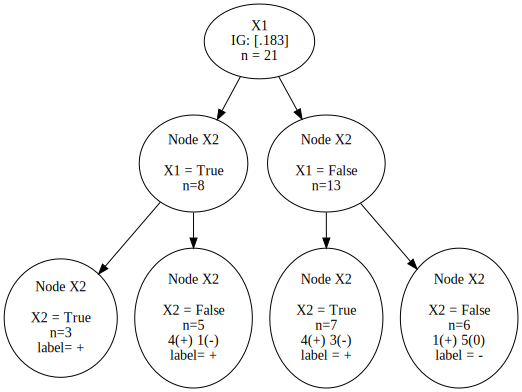

In [104]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()

dot.node('1', 'X1\n IG: [.183]\n n = 21')
dot.node('2', 'Node X2\n\nX1 = True\n n=8')
dot.node('3', 'Node X2\n\n X1 = False\n n=13')
dot.node('4', 'Node X2\n\n X2 = True\n n=3\nlabel= + ')
dot.node('5', 'Node X2\n\n X2 = False\n n=5\n 4(+) 1(-)\n label= +' )
dot.node('6', 'Node X2\n\n X2 = True\n n=7 \n 4(+) 3(-)\n label = +')
dot.node('7', 'Node X2\n\n X2 = False\n n=6 \n 1(+) 5(0)\n label = -')

# Add edges
dot.edges(['12','13','24','25','36','37'])

# Visualize the graph
dot